
# 1. Import Libraries

<br>

In [1]:
# Numerical Analysis
import numpy as np

# Deep Learning and Object Detection
import tensorflow as tf
from tensorflow import keras
import cv2

# Data Visualization
from matplotlib import pyplot as plt


# 2. Import Trained Model

<br>

In [269]:
model = keras.models.load_model(r'_Trainned-CNN-Model/cnn-Face-Mask.h5')


# 3. Import Haar-Cascade Face Classifier

<br>

In [270]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 4. Reading a Sample Image from DataSet
<br>

In [271]:
#trying it out on a sample image

img = cv2.imread('DataSet/images/maksssksksss431.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

faces

array([[232, 145,  56,  56],
       [136, 104,  73,  73],
       [ 17,  59,  65,  65]])

# 5. Defining Classes and Labels
<br>

In [272]:
mask_label = {0: 'Incorrect', 1:'MASK',    2:'NO MASK' }
dist_label = {0: (255,255,0), 1:(0,255,0), 2:(255,0,0)}

# 6. Detection of Face Mask
<br>

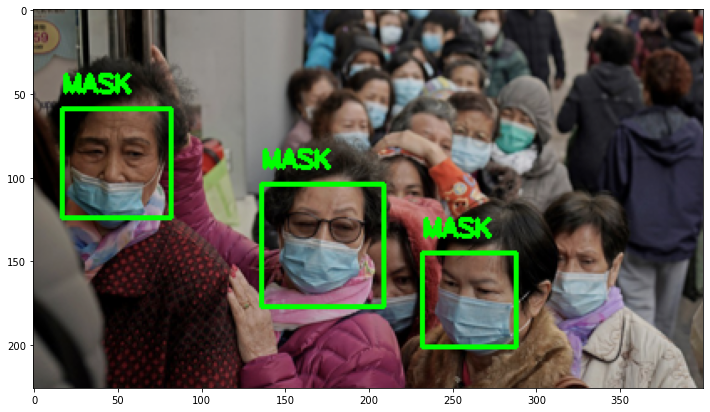

In [273]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(23,22))
    crop = np.reshape(crop,[1,23,22,3])/255.
    mask_result = np.argmax(model.predict(crop)) 

    cv2.putText(img,mask_label[mask_result],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[mask_result],2)
    cv2.rectangle(img,(x,y),(x+w,y+h),dist_label[mask_result],2)


plt.figure(figsize = (12, 8))
plt.imshow(img)
plt.show()